# Implementing and Visualizing Graphs with NetworkX - Lab

## Introduction

In this lab we shall look at implementing and visualizing graphs in networkx based on the methods and capabilities of this library that we've seen in previous code along styled lessons. Again, you are encouraged to refer to networkx documentation during this section due to the sheer number of options and methods available in this library and you will find there more than one ways to solve a problem, most of the times. Let's try to implement and visualize some simple networks here. 

## Objectives 
You will be able to:
- Create graphs in Python using the GraphX library
- Understand properties of nodes and edges, and how they are added and removed to a graph
- Visualize graphs with networkx and matplotlib with conditional coloring

## Exercise 1

Consider the following list of tuples showing connection strengths between a number of cities.
```python
('Paris', 'Warsaw', 841), ('Warsaw', 'Berlin', 584), ('Berlin', 'London', 1101), ('Paris', 'Barcelona', 1038)
```

* Create an undirected graph from this list with cities and nodes and given number as the edge weight between them
* Print the nodes and edges of the graph
* Iterate through the edges and find the highest weight.

In [12]:
import networkx as nx
G = nx.Graph()
G.add_edge('Paris', 'Warsaw', weight=841)
G.add_edge('Warsaw', 'Berlin', weight=584)
G.add_edge('Berlin', 'London', weight=1101)
G.add_edge('Paris', 'Barcelona', weight=1038)

In [41]:
print(sorted(G.edges(data=True),key= lambda x: x[2]['weight'],reverse=True))
# [('Paris', 'Warsaw', {'weight': 841}), ('Paris', 'Barcelona', {'weight': 1038}), ('Warsaw', 'Berlin', {'weight': 584}), ('Berlin', 'London', {'weight': 1101})]
print()
print("Highest weight is: " + str(sorted(G.edges(data=True),key= lambda x: x[2]['weight'],reverse=True)[0][2]['weight']))
# Highest weight is: 1101

[('Berlin', 'London', {'weight': 1101}), ('Paris', 'Barcelona', {'weight': 1038}), ('Paris', 'Warsaw', {'weight': 841}), ('Warsaw', 'Berlin', {'weight': 584})]

Highest weight is: 1101


## Drawing Graphs

Vizualizing networks involves position the nodes and edges in a way such that no nodes overlap, connected nodes are near each other, none of the labels overlap etc. We use what is called a *layout* to plot or visualize graphs in networkx. 

> A layout is an algorithm used to position nodes and edges on a plot automatically in aesthetically and informationally satisfactory ways.

There are several different layout algorithms based on of physical repulsion and spring systems. One important issue is that each layout typically has random initial conditions. Running a plot function twice will return two different plots, both following the rules of the algorithm, but differing due to the initial conditions of the layout. [More details here](https://networkx.github.io/documentation/stable/reference/drawing.html#layout)

## Exercise 2

For this exercise, you are required to replicate the graph shown here. 

![](graphx.png)

Use the `nx.draw()` function, while manipulating following input parameters to mimic the above behavior:

- node_size
- node_color
- width 
- edge color
- font size

Here are the specifications for this graph 
- node 1 size = 800 , nodes 2-5 size = 200 (the size of node may represent its importance in a graph)
- Edge thickness for fat edges = 20 , thin edges = 5 ( The thickness may represent the weight of a link)
- edge color = '#A0CBE2'
- node color = 'salmon'

(you are welcome to try different values in above)

>Remember, due to random generation, your graph may appear to have a different layout, which is perfectly fine. 

C:\Users\RJ\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


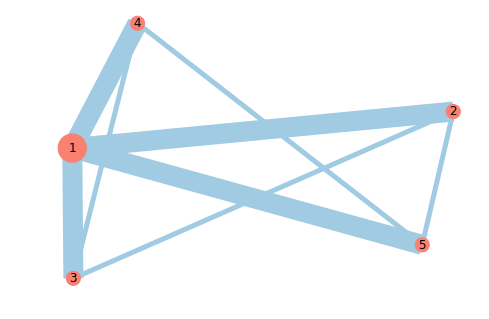

In [94]:
g = nx.Graph()

g.add_node(1, size= 800)
g.add_node(2, size= 200)
g.add_node(3, size= 200)
g.add_node(4, size= 200)
g.add_node(5, size= 200)

g.add_edge(1,2, thickness = 20)
g.add_edge(1,3, thickness = 20)
g.add_edge(1,4, thickness = 20)
g.add_edge(1,5, thickness = 20)
g.add_edge(2,3, thickness = 5)
g.add_edge(3,4, thickness = 5)
g.add_edge(4,5, thickness = 5)
g.add_edge(5,2,thickness = 5)

labels = [node for (node, i) in g.nodes(data=True)]
node_s = [i['size'] for (node, i) in g.nodes(data=True)]
edge_t = [i['thickness'] for (pos1, pos2, i) in g.edges(data=True)]

nx.draw(g, edge_color='#A0CBE2', node_color='salmon', node_size=node_s, width=edge_t, with_labels=True)

## Exercise 3

Let's reload the graph we created for Grey's Anatomy as a gefx file. 

- Load the 'GA_graph.gexf' file using `nx.read_gexf()` 
- show node and edge information from the graph
- draw the graph without any customizations

Name: 
Type: Graph
Number of nodes: 32
Number of edges: 34
Average degree:   2.1250


C:\Users\RJ\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


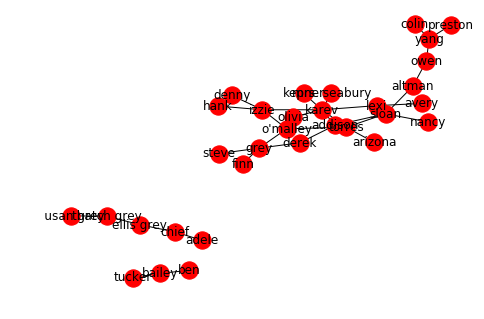

In [123]:
import numpy as np
GA = nx.read_gexf('GA_graph.gexf')
print(nx.info(GA))
nx.draw(GA, with_labels=True)

## Exercise 4

Plot the above graph in a circular layout as shown below 
- Generate the layout and place nodes and edges
- plot nodes, labels, and edges with options
    - fig size = 10,10
    - node size = 500
    - edge width = 3
    - dotted edge style
    - edge color = grey

C:\Users\RJ\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


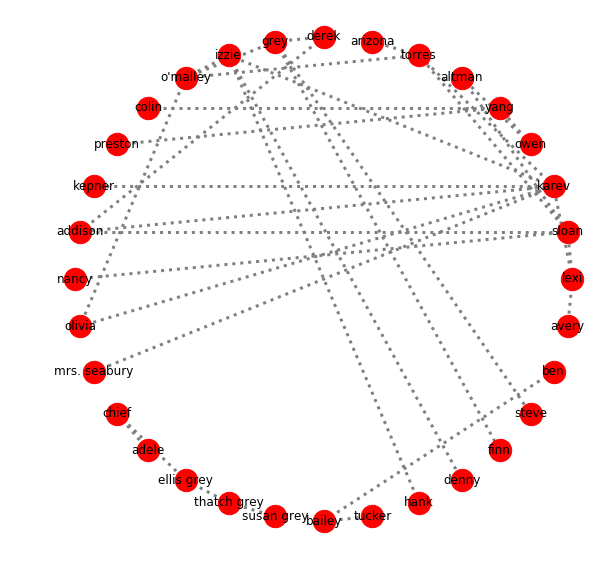

In [134]:
plt.figure(figsize=(10,10))
plt.axis('off')
nx.draw_networkx(GA, pos=nx.circular_layout(GA), width=3, node_size=500, edge_color='grey', style='dotted')
plt.show()

## Exercise 5

Now we shall add an extra property to our GA graph. We shall add a dead_or_alive attribute to our graph based on dictionary given below. The k:v pairs provide us with node:property e.g. `'karev' : 'alive'`. 

- Execute the following cell to read this dictionary into memory and iterate through the dictionary, storing the 'dead' or 'alive' strings in a `status` attribute for each node in the graph above. 

In [135]:
from seaborn import color_palette, set_style, palplot
dead_or_alive = {
    'karev' : 'alive',
    'hank' : 'alive',
    'izzie' : 'alive',
    'mrs. seabury' : 'alive',
    'ben' : 'alive',
    'grey' : 'alive',
    'sloan' : 'dead',
    'steve' : 'alive',
    'kepner' : 'alive',
    'colin' : 'alive',
    'avery' : 'alive',
    'bailey' : 'alive',
    'chief' : 'alive',
    'preston' : 'alive',
    'ellis grey' : 'dead',
    "o'malley" : 'dead',
    'lexi' : 'dead',
    'torres' : 'alive',
    'yang' : 'alive',
    'addison' : 'alive',
    'olivia' : 'alive',
    'altman' : 'alive',
    'denny' : 'dead',
    'arizona' : 'alive',
    'adele' : 'dead',
    'derek' : 'dead',
    'nancy' : 'alive',
    'thatch grey' : 'alive',
    'susan grey' : 'dead',
    'owen' : 'alive',
    'tucker' : 'alive',
    'finn' : 'alive'
}

In [136]:
for i, z in dead_or_alive.items():
    GA.add_node(i)
    GA.node[i]['status'] = z

Here is a function `create_color_map()` that takes in a graph, an attribute for conditional coloring and a seaborn color palette. This function returns a hex color mapping for coloring the nodes of a graph, based on number of classes present in the given attribute. So for our DOA `status` attribute, we need two colors. 

In [137]:
def create_color_map(G, attribute, seaborn_palette="colorblind"):
    """Return a list of hex color mappings for node attributes"""

    attr = [G.node[label][attribute] for label in G.nodes()]
    # get the set of possible attributes
    attr_uniq = list(set(attr))
    vals = len(attr_uniq)
    # generate color palette from seaborn
    palette = color_palette(seaborn_palette, vals).as_hex()
    # create a mapping of attribute to color
    cmap = dict(zip(attr_uniq, palette))
    # map the attribute for each node to the color it represents
    colors = [cmap[attr] for attr in attr]

    return colors, cmap, palette

- Pass in the graph and `status` attribute for coloring nodes. 

In [138]:
# Uncomment and run below to get the distinct node colors, a color map and palette to use
node_colors, color_map, palette = create_color_map(GA, 'status')

## Exercise 6 
Use `node_colors, color_map, palette` variables calculated above and perform following tasks

- Set up a spring layout for the graph
- Use `nx.draw_network_nodes/edges/labels()` as seen earlier to plot the graph shown in the output. 
- Your graph will effectively be the same as the first graph, but the nodes will be colored to show if the character is dead or alive. 

C:\Users\RJ\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


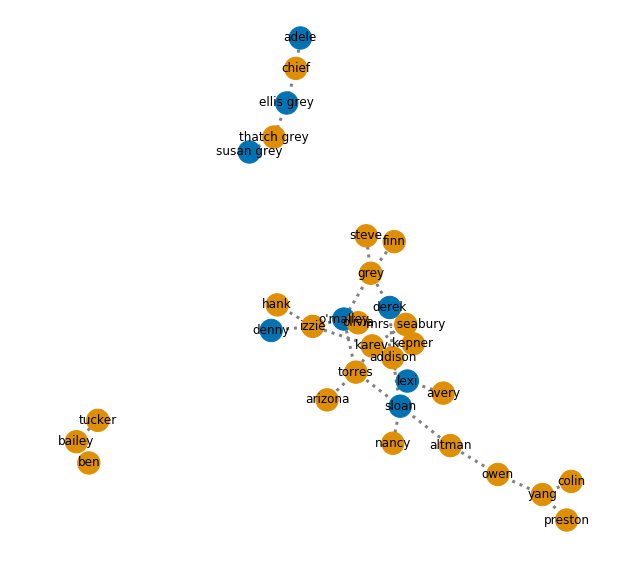

In [144]:
plt.figure(figsize=(10,10))
plt.axis('off')
layout = nx.spring_layout(GA)
nx.draw_networkx_nodes(GA, layout, node_color=node_colors, node_size=500)
nx.draw_networkx_labels(GA, pos=layout)
nx.draw_networkx_edges(GA, layout, width=3, style='dotted', edge_color='grey')
plt.show()

## Summary 

In this lab, we used the skills we have seen in the previous lessons to build simple graphs. We looked at loading a stored graph into networkx and color coding the nodes. We also plotted a simple graph with changing edge thickness to show edge weights. These techniques can be further explored and combined to create great looking graphs. 